In [2]:
import numpy as np

x_values = np.random.uniform(0, 100, size = 100)
x_values

array([ 87.5962755 ,  34.76335992,  59.07748665,  40.49492258,
         6.36882697,  17.07757744,  10.49836801,   7.36936724,
         9.39481443,  44.43680709,  43.67439895,  34.50252121,
        12.63499751,  34.98591464,  48.20836979,   0.78218655,
        91.17947825,   1.56515972,  57.4508048 ,  50.37728361,
        77.8167099 ,  99.86590218,  93.23181157,  62.22359351,
        64.55545639,  70.2039583 ,   1.09347567,   3.76076217,
        45.84732309,  84.87496869,  56.99080009,  35.30286629,
        89.26734918,  16.15540542,  41.7078167 ,  24.70570563,
        60.20466923,  29.34020342,  14.05148577,  50.06613878,
        64.0372815 ,  37.79185703,  63.51383394,  30.74243328,
        64.47314698,  47.72948304,  50.93729759,  83.43676459,
        93.11094119,  89.58464151,  52.75619789,  86.68759172,
         0.61017184,  26.59481421,  58.38819642,  62.22275017,
        93.72435825,  53.70237543,  91.61852489,  42.64351147,
        72.8728218 ,  82.35478781,  62.00462955,  24.16

In [3]:
THETA0 = 25.0
THETA1 = 4.0
NOISE_SCALE = 25.0

y_values = THETA0 + THETA1 * x_values
noise_values = np.random.normal(scale = NOISE_SCALE, size = 100)
y_values += noise_values

print(
    y_values
)
print(
    noise_values
)

[  3.57837896e+02   1.35381513e+02   2.75540238e+02   2.02928728e+02
  -1.19310768e+01   1.06638646e+02   6.65757591e+01   5.58663567e+01
   3.28570674e+01   1.92076359e+02   2.23018685e+02   1.65202956e+02
   2.43251439e+01   2.26241903e+02   1.96362268e+02   2.37331409e+01
   3.83213888e+02   2.68097742e+01   2.29839747e+02   2.17004728e+02
   3.00939543e+02   3.86021710e+02   4.18477154e+02   2.80476864e+02
   2.54814404e+02   3.16271946e+02   2.99444312e+01   1.52643088e+01
   1.91810986e+02   3.73675902e+02   2.47269633e+02   9.89773918e+01
   3.67687074e+02   1.11276532e+02   2.20546743e+02   1.46721449e+02
   2.51649175e+02   1.34291649e+02   9.16217243e+01   2.40044365e+02
   2.88471075e+02   1.56900780e+02   2.73423569e+02   1.44903314e+02
   2.76683474e+02   1.92413591e+02   1.88927367e+02   3.12056984e+02
   4.19590848e+02   3.55845767e+02   2.53118596e+02   3.76401098e+02
   4.10843236e-01   1.53550498e+02   2.47122820e+02   2.65599592e+02
   3.80197301e+02   1.94965028e+02

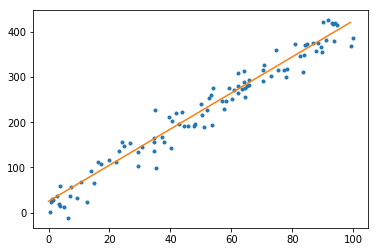

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(
    x_values,
    y_values,
    '.'
)

plt.plot(
    np.arange(0, 100),
    THETA0 + THETA1 * np.arange(0, 100),
    '-',
)


\\[
SSE(\theta_0, \theta_1)
=
\sum_i \left(y^i - \hat{y}^i\right)^2
= 
\sum_i \left(y^i - \left(\theta_0 + \theta_1 x^i\right)\right)^2
\\]


In [5]:
def sse(x_values, y_values, theta0, theta1):
    yhat_values = theta0 + theta1 * x_values
    errors = y_values - yhat_values
    squared_errors = errors * errors
    return np.sum(squared_errors)

print(
    np.sqrt(
        sse(x_values, y_values, THETA0, THETA1) / len(x_values)
    )
)

24.4515047802


In [6]:
DELTA0 = 0.25
DELTA1 = 0.025

def update_thetas(x_values, y_values, theta0, theta1):
    current_sse = sse(x_values, y_values, theta0, theta1)
    
    tweaked_theta0 = theta0 + DELTA0
    if sse(x_values, y_values, tweaked_theta0, theta1) < current_sse:
        new_theta0 = theta0 + DELTA0
    else:
        new_theta0 = theta0 - DELTA0
        
    tweaked_theta1 = theta1 + DELTA1
    if sse(x_values, y_values, theta0, tweaked_theta1) < current_sse:
        new_theta1 = theta1 + DELTA1
    else:
        new_theta1 = theta1 - DELTA1
        
    return (new_theta0, new_theta1)

update_thetas(x_values, y_values, 0, 0)

(0.25, 0.025)

0: 0.25 0.03 6388696.41


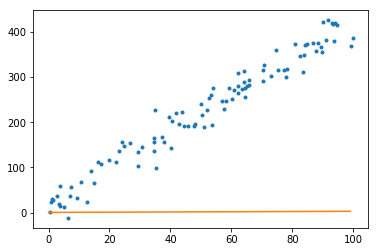

1: 0.50 0.05 6304344.18
2: 0.75 0.08 6220558.55
3: 1.00 0.10 6137339.52
4: 1.25 0.12 6054687.07
5: 1.50 0.15 5972601.22
6: 1.75 0.17 5891081.96
7: 2.00 0.20 5810129.29
8: 2.25 0.22 5729743.22
9: 2.50 0.25 5649923.74
10: 2.75 0.27 5570670.85
11: 3.00 0.30 5491984.55
12: 3.25 0.33 5413864.85
13: 3.50 0.35 5336311.73
14: 3.75 0.38 5259325.22
15: 4.00 0.40 5182905.29
16: 4.25 0.43 5107051.95
17: 4.50 0.45 5031765.21
18: 4.75 0.48 4957045.06
19: 5.00 0.50 4882891.50
20: 5.25 0.53 4809304.54


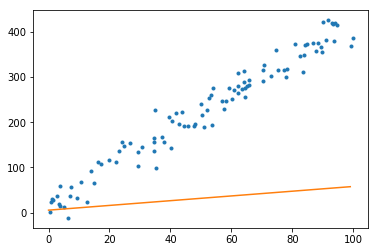

21: 5.50 0.55 4736284.17
22: 5.75 0.58 4663830.39
23: 6.00 0.60 4591943.20
24: 6.25 0.63 4520622.60
25: 6.50 0.65 4449868.60
26: 6.75 0.68 4379681.19
27: 7.00 0.70 4310060.37
28: 7.25 0.73 4241006.15
29: 7.50 0.75 4172518.52
30: 7.75 0.78 4104597.48
31: 8.00 0.80 4037243.03
32: 8.25 0.83 3970455.17
33: 8.50 0.85 3904233.91
34: 8.75 0.88 3838579.24
35: 9.00 0.90 3773491.16
36: 9.25 0.93 3708969.68
37: 9.50 0.95 3645014.79
38: 9.75 0.98 3581626.49
39: 10.00 1.00 3518804.78
40: 10.25 1.03 3456549.66


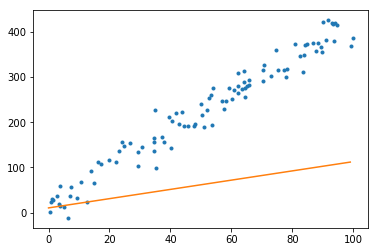

41: 10.50 1.05 3394861.14
42: 10.75 1.08 3333739.21
43: 11.00 1.10 3273183.87
44: 11.25 1.12 3213195.13
45: 11.50 1.15 3153772.97
46: 11.75 1.17 3094917.41
47: 12.00 1.20 3036628.44
48: 12.25 1.22 2978906.07
49: 12.50 1.25 2921750.29
50: 12.75 1.27 2865161.10
51: 13.00 1.30 2809138.50
52: 13.25 1.32 2753682.49
53: 13.50 1.35 2698793.08
54: 13.75 1.37 2644470.26
55: 14.00 1.40 2590714.03
56: 14.25 1.42 2537524.39
57: 14.50 1.45 2484901.35
58: 14.75 1.47 2432844.90
59: 15.00 1.50 2381355.04
60: 15.25 1.52 2330431.78


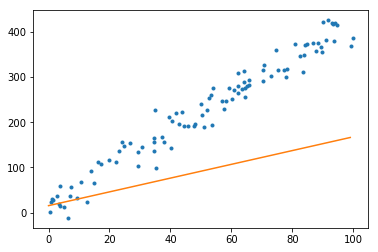

61: 15.50 1.55 2280075.10
62: 15.75 1.57 2230285.02
63: 16.00 1.60 2181061.53
64: 16.25 1.62 2132404.64
65: 16.50 1.65 2084314.33
66: 16.75 1.67 2036790.62
67: 17.00 1.70 1989833.51
68: 17.25 1.72 1943442.98
69: 17.50 1.75 1897619.05
70: 17.75 1.77 1852361.71
71: 18.00 1.80 1807670.96
72: 18.25 1.82 1763546.80
73: 18.50 1.85 1719989.24
74: 18.75 1.87 1676998.27
75: 19.00 1.90 1634573.89
76: 19.25 1.92 1592716.10
77: 19.50 1.95 1551424.91
78: 19.75 1.97 1510700.31
79: 20.00 2.00 1470542.30
80: 20.25 2.02 1430950.88


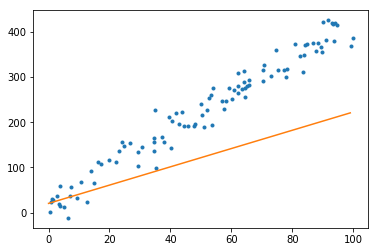

81: 20.50 2.05 1391926.06
82: 20.75 2.07 1353467.83
83: 21.00 2.10 1315576.19
84: 21.25 2.12 1278251.14
85: 21.50 2.15 1241492.69
86: 21.75 2.17 1205300.83
87: 22.00 2.20 1169675.56
88: 22.25 2.22 1134616.88
89: 22.50 2.25 1100124.80
90: 22.75 2.27 1066199.30
91: 23.00 2.30 1032840.41
92: 23.25 2.32 1000048.10
93: 23.50 2.35 967822.38
94: 23.75 2.37 936163.26
95: 24.00 2.40 905070.73
96: 24.25 2.42 874544.80
97: 24.50 2.45 844585.45
98: 24.75 2.47 815192.70
99: 25.00 2.50 786366.54
100: 25.25 2.52 758106.98


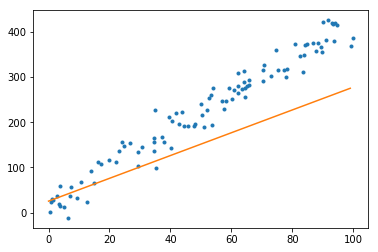

101: 25.50 2.55 730414.00
102: 25.75 2.57 703287.62
103: 26.00 2.60 676727.83
104: 26.25 2.62 650734.63
105: 26.50 2.65 625308.03
106: 26.75 2.67 600448.02
107: 27.00 2.70 576154.60
108: 27.25 2.72 552427.77
109: 27.50 2.75 529267.54
110: 27.75 2.77 506673.89
111: 28.00 2.80 484646.84
112: 28.25 2.82 463186.39
113: 28.50 2.85 442292.52
114: 28.75 2.87 421965.25
115: 29.00 2.90 402204.57
116: 29.25 2.92 383010.48
117: 29.50 2.95 364382.99
118: 29.75 2.97 346322.09
119: 30.00 3.00 328827.78
120: 30.25 3.02 311900.06


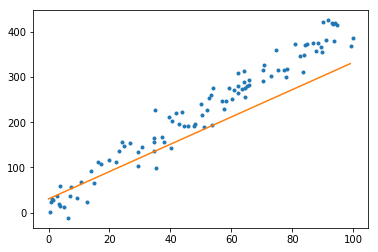

121: 30.50 3.05 295538.94
122: 30.75 3.07 279744.40
123: 31.00 3.10 264516.46
124: 31.25 3.12 249855.12
125: 31.50 3.15 235760.36
126: 31.75 3.17 222232.20
127: 32.00 3.20 209270.63
128: 32.25 3.22 196875.65
129: 32.50 3.25 185047.27
130: 32.75 3.27 173785.47
131: 33.00 3.30 163090.27
132: 33.25 3.32 152961.67
133: 33.50 3.35 143399.65
134: 33.75 3.37 134404.23
135: 34.00 3.40 125975.40
136: 34.25 3.42 118113.16
137: 34.50 3.45 110817.52
138: 34.75 3.47 104088.46
139: 35.00 3.50 97926.00
140: 35.25 3.52 92330.14


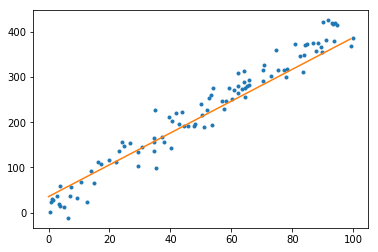

141: 35.50 3.55 87300.86
142: 35.75 3.57 82838.18
143: 36.00 3.60 78942.09
144: 36.25 3.62 75612.59
145: 36.50 3.65 72849.68
146: 36.75 3.67 70653.37
147: 37.00 3.70 69023.65
148: 36.75 3.72 67777.20
149: 36.50 3.75 66843.56
150: 36.25 3.77 66222.73
151: 36.00 3.80 65914.71
152: 35.75 3.77 65885.62
153: 35.50 3.80 65475.71
154: 35.25 3.77 65598.51
155: 35.00 3.80 65086.71
156: 34.75 3.77 65361.41
157: 34.50 3.80 64747.72
158: 34.25 3.82 64446.84
159: 34.00 3.80 64458.72
160: 33.75 3.82 64055.95


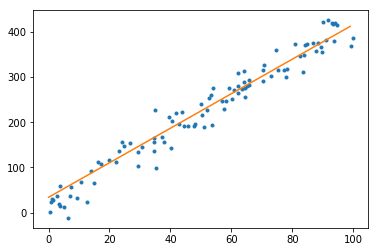

161: 33.50 3.80 64219.72
162: 33.25 3.82 63715.06
163: 33.00 3.80 64030.72
164: 32.75 3.82 63424.17
165: 32.50 3.85 63130.44
166: 32.25 3.82 63183.29
167: 32.00 3.85 62787.66
168: 31.75 3.82 62992.40
169: 31.50 3.85 62494.88
170: 31.25 3.82 62851.51
171: 31.00 3.85 62252.10
172: 30.75 3.87 61965.51
173: 30.50 3.85 62059.33
174: 30.25 3.87 61670.84
175: 30.00 3.85 61916.55
176: 29.75 3.87 61426.17
177: 29.50 3.90 61248.60
178: 29.25 3.87 61231.50
179: 29.00 3.90 60952.04
180: 28.75 3.87 61086.83


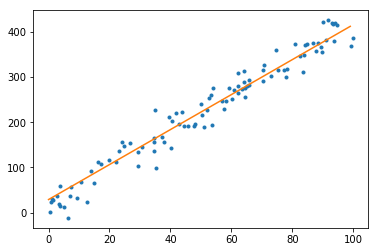

181: 28.50 3.90 60705.48
182: 28.25 3.87 60992.16
183: 28.00 3.90 60508.93
184: 27.75 3.92 60338.50
185: 27.50 3.90 60362.37
186: 27.25 3.92 60090.05
187: 27.00 3.90 60265.81
188: 26.75 3.92 59891.60
189: 26.50 3.90 60219.25
190: 26.25 3.92 59743.15
191: 26.00 3.95 59579.87
192: 25.75 3.92 59644.70
193: 25.50 3.95 59379.53
194: 25.25 3.92 59596.25
195: 25.00 3.95 59229.19
196: 24.75 3.92 59597.80
197: 25.00 3.95 59229.19
198: 24.75 3.92 59597.80
199: 25.00 3.95 59229.19


(25.0, 3.94999999999999)

In [19]:
def plot_data_and_line(x_values, y_values, theta0, theta1):
    plt.plot(
        x_values,
        y_values,
        '.'
    )

    plt.plot(
        np.arange(0, 100),
        theta0 + theta1 * np.arange(0, 100),
        '-',
    )

def run_optimization(x_values, y_values, theta0, theta1):
    for step_idx in range(200):
        theta0, theta1 = update_thetas(x_values, y_values, theta0, theta1)
        current_sse = sse(x_values, y_values, theta0, theta1)
        
        print(f"{step_idx}: {theta0:0.2f} {theta1:0.2f} {current_sse:0.2f}")
        if step_idx % 20 == 0:
            plot_data_and_line(x_values, y_values, theta0, theta1)
            plt.show()
        
    return theta0, theta1

run_optimization(x_values, y_values, 0, 0)

In [27]:
print(sse(x_values, y_values, THETA0, THETA1))

59787.6086014


In [28]:
print(sse(x_values, noise_values, 0, 0))

59787.6086014


In [29]:
print(sse(x_values, noise_values, 0, -0.05))

59229.1871438
